Medical Cost Personal Datasets

https://www.kaggle.com/datasets/mirichoi0218/insurance/code?datasetId=13720&searchQuery=clustering

Intial Load and Basic Info

In [1]:
import pandas as pd

# Load the insurance dataset
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
basic_info = insurance_data.info()
head_data = insurance_data.head()

basic_info, head_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

Numerical and Categorical Descriptive statistics

In [2]:
# For numerical variables, you can use the `describe()` method to get basic statistics
numerical_columns = ['age', 'bmi', 'children', 'charges']  # List your numerical columns
numerical_stats = insurance_data[numerical_columns].describe()

# For categorical variables, you can use `value_counts()` to understand the distribution of each category
categorical_columns = ['sex', 'smoker', 'region']  # List your categorical columns
categorical_stats = {col: insurance_data[col].value_counts() for col in categorical_columns}

# Create a summary to combine both numerical and categorical descriptive statistics
descriptive_statistics = {
    'numerical': numerical_stats,
    'categorical': categorical_stats
}

# Display the descriptive statistics
print(descriptive_statistics)


{'numerical':                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010, 'categorical': {'sex': sex
male      676
female    662
Name: count, dtype: int64, 'smoker': smoker
no     1064
yes     274
Name: count, dtype: int64, 'region': region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64}}


Basic Visualization

C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swadh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


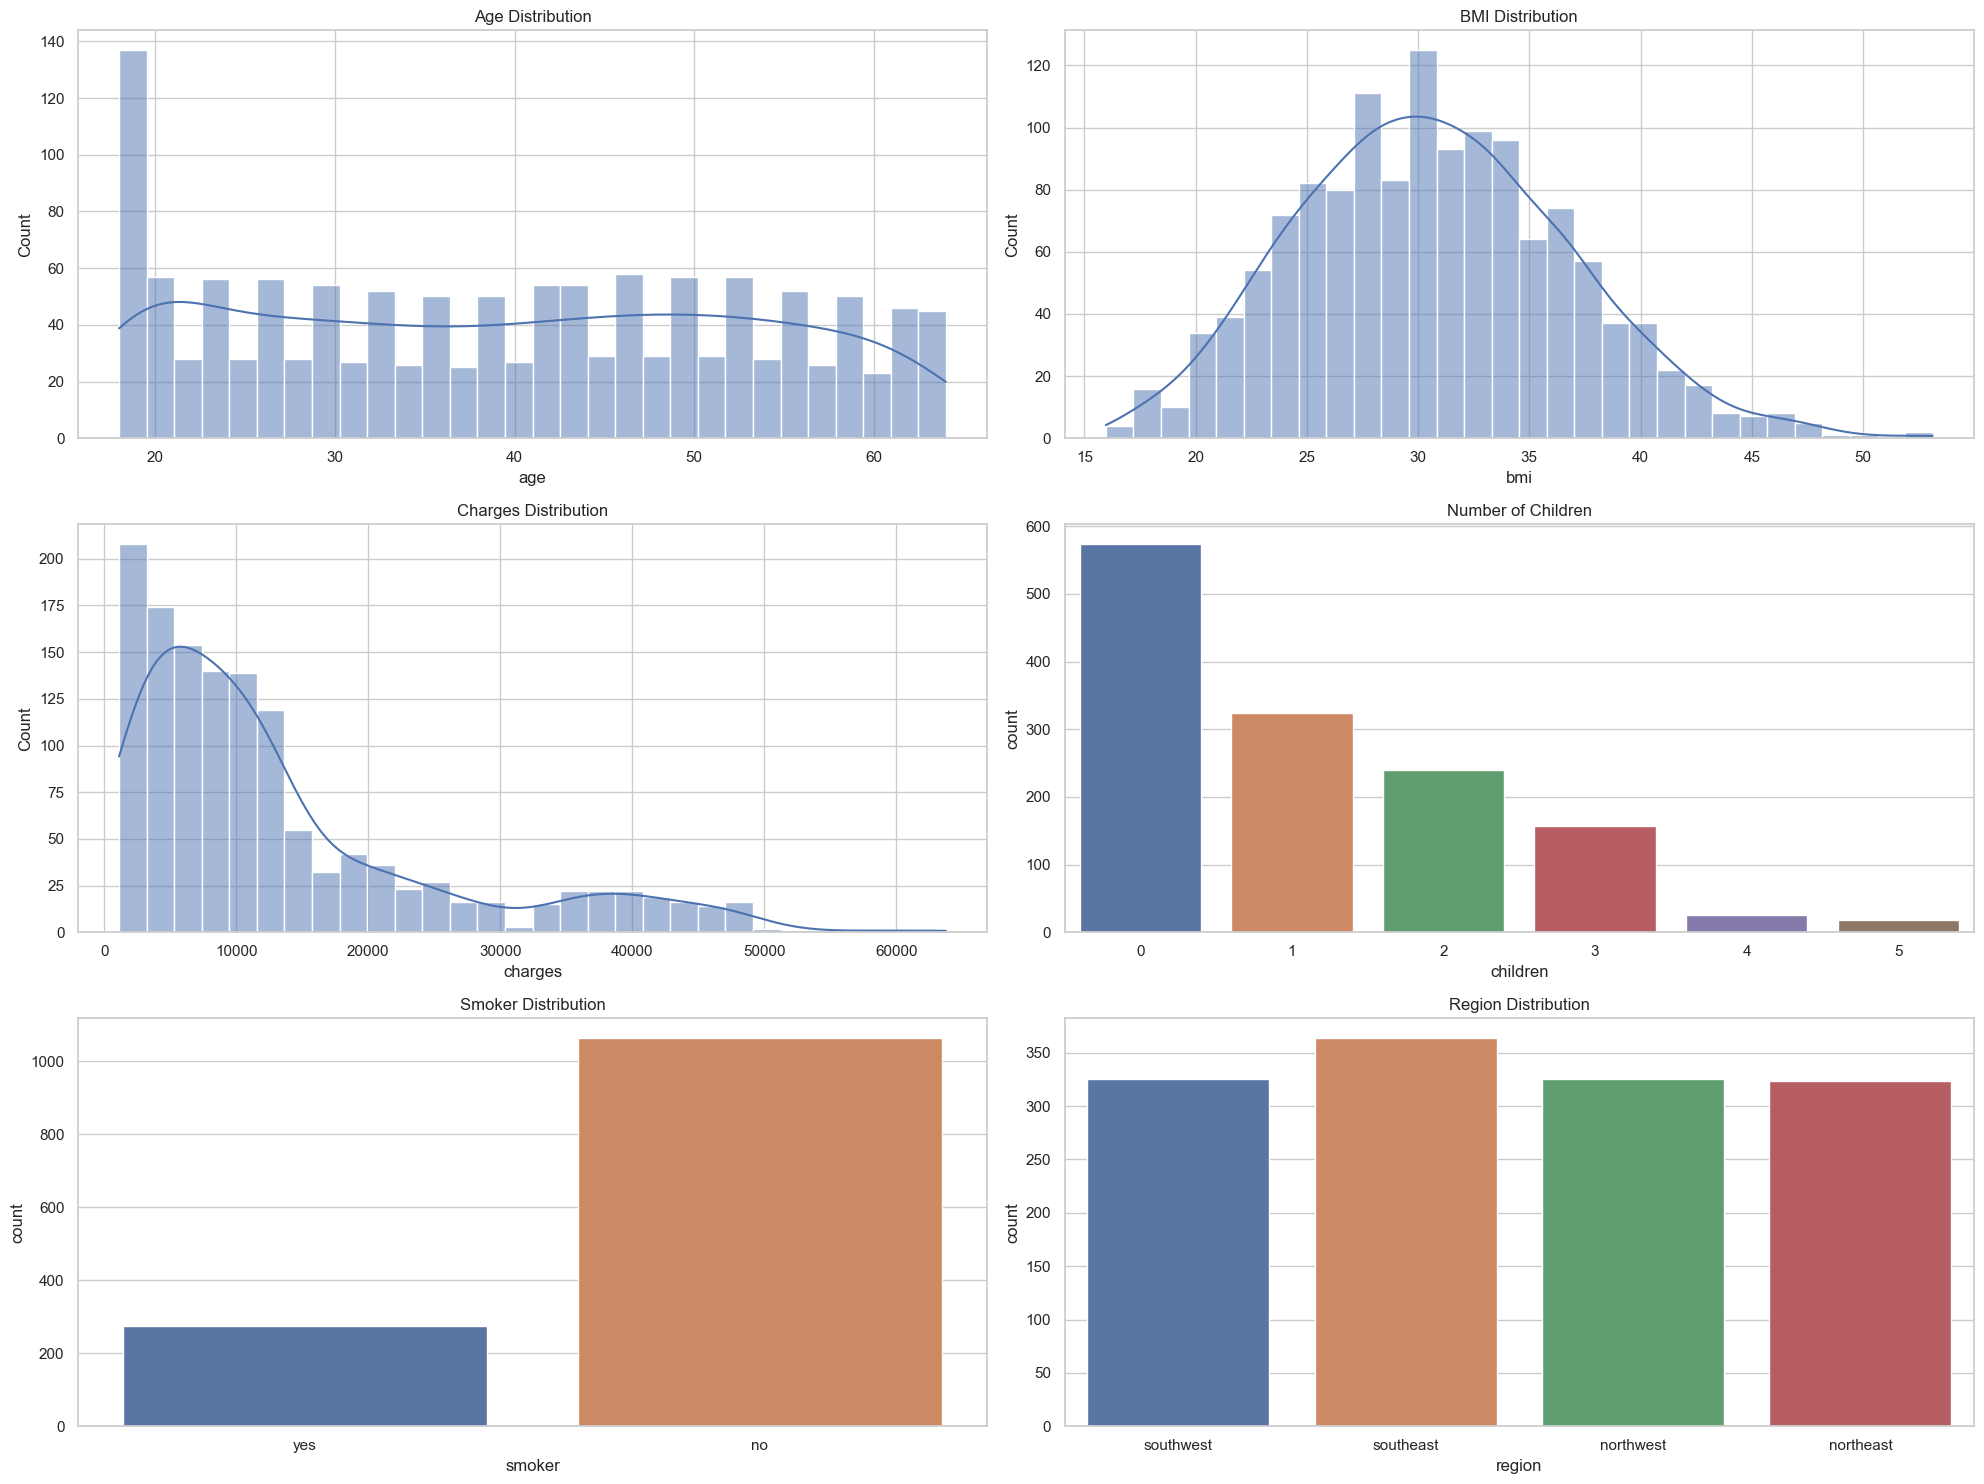

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a figure for subplots
plt.figure(figsize=(20, 15))

# Plot distribution of 'age'
plt.subplot(3, 2, 1)
sns.histplot(insurance_data['age'], bins=30, kde=True)
plt.title('Age Distribution')

# Plot distribution of 'bmi'
plt.subplot(3, 2, 2)
sns.histplot(insurance_data['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')

# Plot distribution of 'charges'
plt.subplot(3, 2, 3)
sns.histplot(insurance_data['charges'], bins=30, kde=True)
plt.title('Charges Distribution')

# Count plot for 'children'
plt.subplot(3, 2, 4)
sns.countplot(x='children', data=insurance_data)
plt.title('Number of Children')

# Count plot for 'smoker'
plt.subplot(3, 2, 5)
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')

# Count plot for 'region'
plt.subplot(3, 2, 6)
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distribution')

# Show the plots
plt.tight_layout()
plt.show()


Data Preprocessing

1. Handling Missing Data 

In [4]:
insurance_data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

2. Feature Separation
3. Pipeline Creation for Numerical Features
4. Scaling
5. Pipeline Creation for Categorical Features
6. Column Transformation
7. Transformation Application
8. Feature Names Extraction
9. Dataframe Reconstruction

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = 'insurance.csv' 
insurance_data = pd.read_csv(file_path)

# Define numerical and categorical features
numerical_features = insurance_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = insurance_data.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler())  # Scale numerical values
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical values
])

# Combine pipelines into a single ColumnTransformer preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_pipeline, numerical_features),
        ('categorical', categorical_pipeline, categorical_features)
    ])

# Apply the preprocessing to the data
insurance_data_preprocessed = preprocessor.fit_transform(insurance_data)

# Convert the preprocessed data back to a DataFrame for better readability
# We need to handle the transformation of the categorical features to get the correct column names
categorical_columns = preprocessor.named_transformers_['categorical']['encoder'].get_feature_names_out(categorical_features)
all_columns = numerical_features + categorical_columns.tolist()

# Create a DataFrame from the numpy array returned by the ColumnTransformer
preprocessed_df = pd.DataFrame(insurance_data_preprocessed, columns=all_columns)


print(preprocessed_df.head())



        age       bmi  children   charges  sex_female  sex_male  smoker_no  \
0 -1.438764 -0.453320 -0.908614  0.298584         1.0       0.0        0.0   
1 -1.509965  0.509621 -0.078767 -0.953689         0.0       1.0        1.0   
2 -0.797954  0.383307  1.580926 -0.728675         0.0       1.0        1.0   
3 -0.441948 -1.305531 -0.908614  0.719843         0.0       1.0        1.0   
4 -0.513149 -0.292556 -0.908614 -0.776802         0.0       1.0        1.0   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0         1.0               0.0               0.0               0.0   
1         0.0               0.0               0.0               1.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               1.0               0.0   
4         0.0               0.0               1.0               0.0   

   region_southwest  
0               1.0  
1               0.0  
2               0.0  
3               

Clustering 

1. K-Means Clustering

In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs  # This is just for demonstration

# Fix for MKL memory leak issue on Windows
os.environ["OMP_NUM_THREADS"] = "2"  

# Example data generation for demonstration purposes
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)  # Scaling data for clustering

# Perform K-means clustering with explicit n_init to avoid FutureWarning
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# Define functions to calculate internal and external distances
def calculate_internal_distances(X, labels):
    clusters = np.unique(labels)
    internal_distances = []
    for cluster in clusters:
        if cluster != -1:
            cluster_points = X[labels == cluster]
            if len(cluster_points) > 1:
                distances = pairwise_distances(cluster_points)
                internal_distances.append(np.mean(distances))
    return np.mean(internal_distances) if internal_distances else None

def calculate_external_distances(X, labels):
    clusters = np.unique(labels)
    external_distances = []
    for cluster in clusters:
        if cluster != -1:
            cluster_points = X[labels == cluster]
            other_points = X[labels != cluster]
            if cluster_points.shape[0] > 0 and other_points.shape[0] > 0:
                distances = pairwise_distances(cluster_points, other_points)
                min_distances = np.min(distances, axis=1)
                external_distances.append(np.mean(min_distances))
    return np.mean(external_distances) if external_distances else None

# Calculate internal and external distances
kmeans_internal_dist = calculate_internal_distances(X, kmeans_labels)
kmeans_external_dist = calculate_external_distances(X, kmeans_labels)

# Collect results
results = {
    "KMeans": {
        "Silhouette Score": kmeans_silhouette,
        "Internal Distance": kmeans_internal_dist,
        "External Distance": kmeans_external_dist
    }
}


formatted_results = '\n'.join(
    f"{algorithm} Clustering:\n"
    f"  Silhouette Score: {metrics['Silhouette Score']}\n"
    f"  Internal Distance: {metrics['Internal Distance']}\n"
    f"  External Distance: {metrics['External Distance']}\n"
    for algorithm, metrics in results.items()
)

print(formatted_results)
    

C:\Users\swadh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans Clustering:
  Silhouette Score: 0.6569234398199433
  Internal Distance: 0.5325035676167018
  External Distance: 0.9913233996262703



2. Hierarchical Clustering

In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs  # This is just for demonstration

# Fix for MKL memory leak issue on Windows
os.environ["OMP_NUM_THREADS"] = "2"  

# Example data generation for demonstration purposes
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)  # Scaling data for clustering

# Perform Hierarchical clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X)
agglo_silhouette = silhouette_score(X, agglo_labels)

# Define functions to calculate internal and external distances
def calculate_internal_distances(X, labels):
    clusters = np.unique(labels)
    internal_distances = []
    for cluster in clusters:
        if cluster != -1:
            cluster_points = X[labels == cluster]
            if len(cluster_points) > 1:
                distances = pairwise_distances(cluster_points)
                internal_distances.append(np.mean(distances))
    return np.mean(internal_distances) if internal_distances else None

def calculate_external_distances(X, labels):
    clusters = np.unique(labels)
    external_distances = []
    for cluster in clusters:
        if cluster != -1:
            cluster_points = X[labels == cluster]
            other_points = X[labels != cluster]
            if cluster_points.shape[0] > 0 and other_points.shape[0] > 0:
                distances = pairwise_distances(cluster_points, other_points)
                min_distances = np.min(distances, axis=1)
                external_distances.append(np.mean(min_distances))
    return np.mean(external_distances) if external_distances else None

# Calculate internal and external distances
agglo_internal_dist = calculate_internal_distances(X, agglo_labels)
agglo_external_dist = calculate_external_distances(X, agglo_labels)

# Collect results
results = {
    "Hierarchical Clustering": {
        "Silhouette Score": agglo_silhouette,
        "Internal Distance": agglo_internal_dist,
        "External Distance": agglo_external_dist
    }
}


formatted_results = '\n'.join(
    f"{algorithm} Clustering:\n"
    f"  Silhouette Score: {metrics['Silhouette Score']}\n"
    f"  Internal Distance: {metrics['Internal Distance']}\n"
    f"  External Distance: {metrics['External Distance']}\n"
    for algorithm, metrics in results.items()
)

print(formatted_results)
    

Hierarchical Clustering Clustering:
  Silhouette Score: 0.6565591503146831
  Internal Distance: 0.5327770532696038
  External Distance: 1.0044275441203752



3. DBSCAN Clustering

In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs  # This is just for demonstration

# Fix for MKL memory leak issue on Windows
os.environ["OMP_NUM_THREADS"] = "2"  

# Example data generation for demonstration purposes
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)  # Scaling data for clustering

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)
dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else None

# Define functions to calculate internal and external distances
def calculate_internal_distances(X, labels):
    clusters = np.unique(labels)
    internal_distances = []
    for cluster in clusters:
        if cluster != -1:
            cluster_points = X[labels == cluster]
            if len(cluster_points) > 1:
                distances = pairwise_distances(cluster_points)
                internal_distances.append(np.mean(distances))
    return np.mean(internal_distances) if internal_distances else None

def calculate_external_distances(X, labels):
    clusters = np.unique(labels)
    external_distances = []
    for cluster in clusters:
        if cluster != -1:
            cluster_points = X[labels == cluster]
            other_points = X[labels != cluster]
            if cluster_points.shape[0] > 0 and other_points.shape[0] > 0:
                distances = pairwise_distances(cluster_points, other_points)
                min_distances = np.min(distances, axis=1)
                external_distances.append(np.mean(min_distances))
    return np.mean(external_distances) if external_distances else None

# Calculate internal and external distances
dbscan_internal_dist = calculate_internal_distances(X, dbscan_labels) if dbscan_silhouette is not None else None
dbscan_external_dist = calculate_external_distances(X, dbscan_labels) if dbscan_silhouette is not None else None

# Collect results
results = {
    "DBSCAN": {
        "Silhouette Score": dbscan_silhouette,
        "Internal Distance": dbscan_internal_dist,
        "External Distance": dbscan_external_dist
    }
}

# Format and print the results
formatted_results = '\n'.join(
    f"{algorithm} Clustering:\n"
    f"  Silhouette Score: {metrics['Silhouette Score']}\n"
    f"  Internal Distance: {metrics['Internal Distance']}\n"
    f"  External Distance: {metrics['External Distance']}\n"
    for algorithm, metrics in results.items()
)

print(formatted_results)
    

DBSCAN Clustering:
  Silhouette Score: 0.5942168218296967
  Internal Distance: 0.47685859086928617
  External Distance: 0.5532662173956442

